<a href="https://colab.research.google.com/github/Zaicevvv/goit-dsandml-private/blob/main/HW5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
data = pd.read_html(
    url,
    match="Коефіцієнт народжуваності в регіонах України",
    decimal=",",
    thousands=".",
)[0]

Вивести перші рядки таблиці за допомогою методу head

In [3]:
print(data.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [9]:
print(data.shape)

(28, 9)


Замініть у таблиці значення "—" на значення NaN

In [12]:
data.replace('—', 'NaN')
print(data)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [14]:
print(data.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [17]:
data['2014'] = pd.to_numeric(data['2014'], errors='coerce')
data['2019'] = pd.to_numeric(data['2019'], errors='coerce')

print(data.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [21]:
print(data.isnull().sum())

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64


Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [22]:
data.drop([len(data) - 1], inplace=True)
print(data)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [34]:
for column in data.columns[1:]:
    data[column].fillna(data[column].mean(), inplace=True)
    data[column] = data[column].round(1)
print(data)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.1   8.0
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   8.0
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   8.0
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [36]:
average_2019_region = data[data['2019'] > data['2019'].mean()]['Регіон'].tolist()
print(average_2019_region)

['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


У якому регіоні була найвища народжуваність у 2014 році?

In [37]:
max_birth_rate_2014_region = data[data['2014'] == data['2014'].max()]['Регіон']
print(max_birth_rate_2014_region)

16    Рівненська
Name: Регіон, dtype: object


Візуалізація

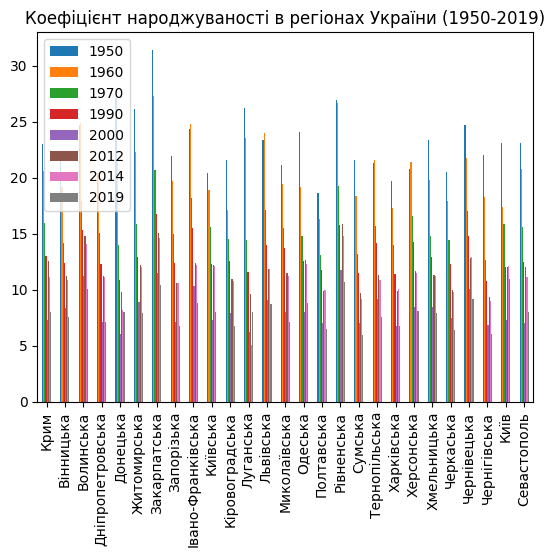

In [46]:
data.plot(kind="bar", title='Коефіцієнт народжуваності в регіонах України (1950-2019)')
plt.xticks(range(len(data)), data.iloc[:, 0])
plt.show()